# Homework #5 (Due 10/14/2021, 11:59pm)
## Hierarchical Models and the Theory of Variational Inference

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2021**

**Name: Jiahui Tang**

**Students collaborators: Yujie Cai**



### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [1]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# data_df is the dataframe of your data
# estimates_df is a numpy array of cancer rate estimates, one for each county
def scatter_plot_cancer_rates(data_df, estimates=None):
    ax = data_df.plot(kind='scatter', x="pop",y="pct_mortality", alpha=0.1, color="grey")
    bot_kcancer_counties = data_df.sort_values(by='pct_mortality',ascending=True)[:300]
    top_kcancer_counties = data_df.sort_values(by='pct_mortality',ascending=False)[:300]
    top_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",
                              alpha=0.1, color="red", ax=ax, logx=True, label = "highest cancer rate")
    bot_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",
                              alpha=0.1, color="blue", ax=ax, logx=True, label = "lowest cancer rate")
    if estimates is not None:
        ax.plot(data_df['pop'], 5 * estimates, '.', alpha=0.2, color="green", label='mean estimates')
    ax.set_ylim([-0.0001, 0.0003])
    

In [3]:
# data_df is the dataframe of your data
# estimates_df is a numpy array of cancer rate estimates, one for each county
def scatter_plot_cancer_rates_orange(data_df, estimates=None):
    ax = data_df.plot(kind='scatter', x="pop",y="pct_mortality", alpha=0.1, color="grey")
    bot_kcancer_counties = data_df.sort_values(by='pct_mortality',ascending=True)[:300]
    top_kcancer_counties = data_df.sort_values(by='pct_mortality',ascending=False)[:300]
    top_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",
                              alpha=0.1, color="red", ax=ax, logx=True, label = "highest cancer rate")
    bot_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",
                              alpha=0.1, color="blue", ax=ax, logx=True, label = "lowest cancer rate")
    if estimates is not None:
        ax.plot(data_df['pop'], 5 * estimates, '.', alpha=0.2, color="orange", label='mean estimates')
    ax.set_ylim([-0.0001, 0.0003])
    

# Problem Description: Understanding EM and Variational Inference

In this problem, we will draw concrete connections between EM and variational inference by applying both methods to a certain class of latent variable models. You'll need to refer to relevant lecture notes on the derivations of EM and the derivation of the variational inference objective. This is an essay question that requires you to engage with complex derivations at a productive but still high level. No implementation is required.

#### Non-Bayesian Latent Variable Model
Recall the class of latent variable models we studied in lecture:
<img src="fig/graphical_model.jpg" style="height:150px;">

#### Bayesian Latent Variable Model
A Bayesian version of the same class of models involve adding priors for the model parameters:
<img src="fig/bayesian_model.jpg" style="height:150px;">

1. **(Comparing ELBOs)** For the above type of Bayesian latent variable model, write down the ELBO for variational inference with a mean field variational family. Compare the variational inference ELBO for the Bayesian model to the expectation maximization ELBO for the non-Bayesian model. What are the differences and similarities between these two ELBOs?

  In both EM and variational inference we optimize the ELBO. Compare the update steps in EM to the update steps in Coordinate Ascent Variational Inference, draw a concrete analogy between them.
  
  ***Hint:*** To make both ELBO's comparable, make sure that both are in terms of $z, y, \theta, \phi$.
  <br><br>
  

<font color="darkblue">
    
**Answer:**
    
    
ELBO for **EM** for non-Bayesian model:

$$ELBO^{\text{EM}}(\theta, \phi, q(z))  = \mathbb{E}_{z\sim q(z)}\left[\log\left(\frac{p(y, z|\theta, \phi)}{q(z)}\right)\right] = \mathbb{E}_{z\sim q(z)} \left[\log \left(\frac{P(y|z,\phi)p(z|\theta)}{q(z)}\right)\right]
$$

The ELBO for **Variational Inference** with a mean field variational family, where  $\psi=(\theta,\phi,Z)$:

$$ELBO^{\text{VI}}(\psi) = \mathbb{E}_{\psi \sim q(\psi|\lambda)}\left[\log\left(\frac{p(\psi, Y_1, \ldots, Y_N |a,b))}{q(\psi | \lambda)} \right)\right] $$

Write out in terms of $z, y, \theta, \phi$
    
$$
ELBO = \mathbb{E}_{z, \phi, \theta \sim q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3)} \left[\log\left(\frac{p(y, z, \theta, \phi|a, b)}{q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3)}\right)\right]
$$



**The differences and similarities between these two ELBOs:**
    
**Similarities:**
 1. They all incorporate an auxilary function $q(z)$ in order to take the gradients.
 2. Both take an expectation log ratio between joint distribution over distributions that are not that of the observed variable (auxilary distribution $q$ or variational distribution $q$).

**Differences:**
1. For VI, we introduce an additional parameter $\lambda$ for the variation family $Q$, and it is maximized using expetctation wrt the variation family.
2. In EM, $\phi$ and $\theta$ are known constants, and produce point estimation; In VI, they are random variables with distribution and we derive posterior over them;  Thus in EM, we optimize the ELBO wrt $\theta$ and $\phi$ as point estimates; In variational inference, we optimize over the distribution of $\theta$ and $\phi$ 
3. The difference between the ELBO and the KL divergence is the log normalizer (i.e. the evidence), which is the quantity that the ELBO bounds. 
4. In VI, we take the expectation over the distribution of a hyperparameter. In EM, we take the expectation over the distribution of the latent variable. 


**Special Case**:
    
EM is a special case of ELBO if we use mean-field VI where the variational distributions $q$ are assumed to be point estimations. That is, Let $\theta^{*}$ and $\phi^{*}$ be the unknown location of this point mass:
    $$q_{\theta}(\theta)=\delta\left(\theta-\theta^{*}\right)$$
     $$q_{\phi}(\phi)=\delta\left(\phi-\phi^{*}\right)$$
    
VI will minimize a KL divergence, and so when we minimumize over the variational family, it is the E-step of EM; and the further when minimizing over $\theta^{*}$ is the M-step of EM.

2. **(Comparing ELBOs and KL-divergences)** Recall that the original objective of variational inference is to minimize a KL-divergence, we rewrote the objective to be that of maximizing the ELBO. Why is directly minimizing the KL-divergence in the original objective difficult (be specific about wherein the difficulty lies)? 

  In the derivation of the E-step of EM, we reframed an maximization of the ELBO problem as a minimization of a KL-divergence problem. In this case, why was the KL-divergence easier to minimize and the ELBO harder to maximize (use the instantiation of the E-step for Gaussian Mixture Models in Lecture 7 to help support your answer)? 

  In the notes for Lecture 8, we introduce a way to maximize the variational inference ELBO -- through coordinate ascent. In the derivation of the updates for coordinate ascent, there is a place where we reframed an maximization of the ELBO problem as an equivalent minimization of a KL-divergence problem. Write down the exact form of this equivalence (the two expressions are separated in the derivation by a bunch of lines, you'll need to identify both parts that you need). In this case, why was the KL-divergence easier to minimize and the ELBO harder to maximization (use the instantiation of the update for Gaussian Mixture Models in Lecture 8 to help support your answer)?

  Based on this analysis, can you draw some general conclusions about when we'd prefer to minimize the KL-divergence versus when we'd prefer to maximize the ELBO?<br><br>


    
**Answer:**
    
Recall that the original objective of variational inference is to minimize a KL-divergence, we rewrote the objective to be that of maximizing the ELBO. Why is directly minimizing the KL-divergence in the original objective difficult (be specific about wherein the difficulty lies)?

 

<font color="darkblue">

    
    
In VI, we are finding a tractable distribution $q$ that best approximate the complex distribution $p$ by minimizing KL divergence.
    
$$
\begin{aligned}
\lambda^* &= \underset{\lambda}{\text{argmin}}\; D_{\text{KL}}(q(\psi|\lambda) \| p(\psi|Y_1, \ldots, Y_N, a, b))) \\
&= \underset{\lambda}{\text{argmin}}\; \mathbb{E}_{\psi \sim q(\psi|\lambda)}\left[\log\left(\frac{q(\psi | \lambda)}{p(\psi|Y_1, \ldots, Y_N))}\right) \right]
\end{aligned}$$

Write out in terms of $z, y, \theta, \phi$

    
$$
\underset{\lambda}{\min} D_{\text{KL}}[q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3) \| p(\theta, \phi, z|y, a, b)] = \underset{\lambda}{\min} \mathbb{E}_{z, \phi, \theta \sim q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3)} \left[\log \left( \frac{q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3)}{p(\theta, \phi, z|y, a, b)}\right) \right]
$$
    


By Bayes' rule, the denominator in the log ratio

$$
p(\theta, \phi, z|y, a, b) = \frac{p(y, z, \theta, \phi| a, b)}{p(y | a, b)} = \frac{p(y, z, \theta, \phi| a, b)}{\int p(y, z, \theta, \phi| a, b) \mathrm{d}(z, \theta,\phi)} \propto p(y, z, \theta, \phi| a, b)
$$

Therefore
\begin{aligned}
D_{\text{KL}}[q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3) \| p(\theta, \phi, z|y, a, b)] &= \mathbb{E}_{z, \phi, \theta \sim q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3)} \left[\log \left( \frac{q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3) p(y | a, b)}{ p(y, z, \theta, \phi| a, b)}\right) \right]\\
    & =  \mathbb{E}_{z, \phi, \theta \sim q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3)} \left[\log q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3) + \log p(y | a, b) - \log p(y, z, \theta, \phi| a, b) \right]\\
    \end{aligned}
    
But that $\log p(y| a, b) = \int p(y, z, \theta, \phi| a, b)\mathrm{d}(z, \theta,\phi) $ involve integration that's intractable to integrate over $(z, \theta,\phi)$.
    
But with ELBO, 
    
\begin{aligned}
ELBO &= \mathbb{E}_{z, \phi, \theta \sim q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3)} \left[\log\left(\frac{p(y, z, \theta, \phi|a, b)}{q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3)}\right)\right]\\
&= \mathbb{E}_{z, \phi, \theta \sim q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3)} \left[\log p(y, z, \theta, \phi|a, b) - \log q(z, \phi, \theta |\lambda_1, \lambda_2, \lambda_3) \right]
\end{aligned}
    
The term no longer involves $\log p(y| a, b)$, making it easier to compute.
Thus, directly minimizing the KL-divergence in the original objective is difficult, we used maximizing ELBO.The issue is that the gradient taken is with respect to the parameter $\psi$ of the distribution of which we are taking the expectation - i.e. we cannot push the gradient into the expectation.

In the derivation of the E-step of EM, we reframed an maximization of the ELBO problem as a minimization of a KL-divergence problem. In this case, why was the KL-divergence easier to minimize and the ELBO harder to maximize (use the instantiation of the E-step for Gaussian Mixture Models in Lecture 7 to help support your answer)?

<font color="darkblue">

**Why KL-divergence is easier to minimize and the ELBO is harder to maximize in EM:**

1. Theoretically, when KL is minimized, we know the approximated distribution is the same as the true distribution. 
2. Since we already know what one of the distributions are, we can just equate the other distribution to it and be done. Hence, KL divergence is easier to minimize in this situation
3. Practically, in ELBO, we need to conduct two sets of iterations, one for E-step and another for M step. Also, we only converge to the lower bound, which is not guaranteed to be the true optimized value.
4. Besides, for the E-step of EM, it is hard to maximize the ELBO with respect to the auxiliary $q$ function due to complex integration and multivariate gradients.

To be specific, in E-step, 
$$
\underset{q}{\max} ELBO(\theta^*, \phi^*, q(z)) = \underset{q}{\max} \mathbb{E}_{z\sim q(z)}\left[\log\left(\frac{p(y, z|\theta^*, \phi^*)}{q(z)}\right)\right]
$$
(after M step, we get $\theta^*, \phi^*$ as optimized values)
    
To get that, we will take gradient of ELBO, that is, $\nabla \mathbb{E}_{z\sim q(z)}\left[\log\left(\frac{p(y, z|\theta^*, \phi^*)}{q(z)}\right)\right]$. But taking gradient with respect to the auxiliary $q$ function due to complex integration and multivariate gradients will be very hard.
    
Therefore, we think about minimize the KL-divergence, as it is easier to minimize KL divergence.
    

In the notes for Lecture 8, we introduce a way to maximize the variational inference ELBO -- through coordinate ascent. In the derivation of the updates for coordinate ascent, there is a place where we reframed an maximization of the ELBO problem as an equivalent minimization of a KL-divergence problem. Write down the exact form of this equivalence (the two expressions are separated in the derivation by a bunch of lines, you'll need to identify both parts that you need). In this case, why was the KL-divergence easier to minimize and the ELBO harder to maximization (use the instantiation of the update for Gaussian Mixture Models in Lecture 8 to help support your answer)?

<font color="darkblue">

**In coordinate ascent, now why we choose minimizing KL-divergence?**

Maximize ELBO is equivalent to minimize the KL-divergence in coordinate ascent.

$\underset{\lambda_i}{\max}\mathbb{E}_{\psi_i \sim q(\psi_i|\lambda_i)}\left[\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} \left[\log \left(\frac{p(\psi,data)}{q(\psi|\lambda)}\right)\right]\right] $
$\equiv \underset{\lambda_i}{\min} D_{\text{KL}}\left[q(\psi_i|\lambda_i)|| z \exp \{\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} [\log p(\psi_i,data|\psi_{-i}]\}\right]$
    
    
For the following, we will use the following notation:

\begin{aligned}
\lambda_{-i} &= [\lambda_1\; \ldots\; \lambda_{i-1}\; \lambda_{i+1}\; \ldots\; \lambda_{I}]\\
\psi_{-i} &= [\psi_1\; \ldots\; \psi_{i-1}\; \psi_{i+1}\; \ldots\; \psi_{I}]\\
q(\psi_{-i}|\lambda_{-i}) &= \prod_{j\neq i}q(\psi_{j}|\lambda_{j})\\
\end{aligned}
    
From lecture 10, we have shown that 
    $$\mathbb{E}_{\psi \sim q(\psi|\lambda)}[\ldots] = \mathbb{E}_{\psi_i \sim q(\psi_i|\lambda_i)}\left[\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})}[\ldots] \right]$$
    
    
and the exact form of the equivalence:
   

\begin{aligned}
\underset{\lambda_i}{\max} ELBO(\lambda) &= \underset{\lambda_i}{\max} \mathbb{E}_{\psi_i \sim q(\psi_i|\lambda_i)}\left[\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} \left[\log \left(\frac{p(Y_1, \ldots, Y_N, \psi_i | \psi_{-i})}{q(\psi_{i}|\lambda_{i})} \right)\right]\right]\\
&= \underset{\lambda_i}{\min}D_{\text{KL}} \left[ q(\psi_{i}|\lambda_{i})\| \mathcal{Z}\exp\left\{\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} \left[\log \left(p(Y_1, \ldots, Y_N, \psi_i | \psi_{-i}) \right)\right]\right\}\right].
\end{aligned}

As the last set of questions, if we set $q(\psi_{i}|\lambda_{i})$ equal to $\mathcal{Z}\exp\left\{\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} \left[\log \left(p(Y_1, \ldots, Y_N, \psi_i | \psi_{-i}) \right)\right]\right\}$, we can solve the optimization. This will be easier than if we compute the gradient of of $ELBO$. In Gaussian Mixture models, in lec10 derivation, terms with subscript $-i$ will become constant after iterations.


Based on this analysis, can you draw some general conclusions about when we'd prefer to minimize the KL-divergence versus when we'd prefer to maximize the ELBO?

<font color="darkblue">
    
**Conclusion**

1. Look for complexity of mathematics when implementing the right method

2. We use KL divergence when we know one of the distributions exactly - then it is clear that the to minimize the divergence we just have to equate the other distribution to the other distribution

3. When the form of probability $P(A|B)$ is known and not intractible, we can use KL divergence minimization. When $P(A|B)$ is unknown and hard to compute, we can choose to work with ELBO, but this still require the joint of $A$ and $B$ to be tractable. 

3. **(The Mean Field Assumption and Coordinate Ascent)**  Describe exactly when and how the mean field assumption is used in the derivation of the coordinate ascent updates. <br><br>

<font color="darkblue">
    
**Answer:**


We assume that the joint $q(\psi)$ factorizes completely over each dimension of $\psi$, i.e. $q(\psi)= \prod_{i=1}^I q(\psi_i | \lambda_i)$. This is called the ***mean field assumption***. This assumes that each dimension of $q(\psi)$ is independent from the others, which may or may not be valid, but it helps to simplify the expression of $q(\psi)$, making it easier to find the ELBO. Thus it is a design choice to make, and it could also go wrong with this design choice.

The coordinate ascent algorithm maximize an objective function ELBO by iteractively maximizing over one dimension, while holding other dimension constant. That's why it requires us to be able to use mean field assumption and factorize $q(\psi)$ into individual pieces.
    
To use mean field assumption, we will maximize the $ELBO$ by following steps in the derivation of the coordinate ascent updates.

1. Use the mean-field assumption to break up the expectation $\mathbb{E}_{\psi \sim q(\psi|\lambda)}$ into an iterated expectation $\mathbb{E}_{\psi_i \sim q(\psi_i|\lambda_i)}\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})}$
2. We will rewrite the outer expectation $\mathbb{E}_{\psi_i \sim q(\psi_i|\lambda_i)}$ as a negative KL-divergence
3. We will then maximize the negative KL-divergence by setting the two arguments of the divergence equal to each other



4. **(Generalizability of CAVI)** Summarize what kind of derivations/math is needed in order instantiate Coordinate Ascent Variational Inference (CAVI) for a given new model (look at what we did for Gaussian Mixture Models in Lecture 8 and predict what you'd need to do for a new model). Based on this, discuss the potential draw backs of using CAVI for Bayesian inference in general. What do these draw backs imply about the practicality of variational inference as an inference method?<br><br>


<font color="darkblue">
    
**Answer:**
    
We see that 

$$
D_{\text{KL}} \left[ q(\psi_{i}|\lambda_{i})\| \mathcal{Z}\exp\left\{\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} \left[\log \left(p(Y_1, \ldots, Y_N, \psi_i | \psi_{-i}) \right)\right]\right\}\right]
$$

is minimized when 

$$
 q(\psi_{i}|\lambda_{i})\propto \exp\left\{\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} \left[\log \left(p(Y_1, \ldots, Y_N, \psi_i | \psi_{-i}) \right)\right]\right\}.
$$

This is also exactly where the ELBO is maximized.


**Derivations/Math needed:**

1. We need mean field assumption to derive the variational distribution of each variable or parameter independently and separately.
2. For each i, we need to set $q(\psi_{i}|\lambda_{i})$ equal to $\mathcal{Z}\exp\left\{\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} \left[\log \left(p(Y_1, \ldots, Y_N, \psi_i | \psi_{-i}) \right)\right]\right\}$ to solve for ELBO iteractively in CAVI.
3. We need lengthy algebraic manipulation to expand the expectation term
4. Computational wise also expensive, need to iterate through $\lambda_i$


**Drawbacks**
1. It may never converge
2. We will never be able to capture the full complexity of target distribution by sampling from posterior q
3. We are trading off fidelity for computational tracibility.
4. Computational heavy, we need to derive different $q(\psi_{i}|\lambda_{i})$ at each iteration for different models.
5. We need conduct lengthy posterior derivations for each latent variable / paramter which may result in intractable posterior distributions


**Particability**

It is still practical but it may be need some mathematical derivations when iteractively minimize KL. In each step, variety of complex algorithms and sampling methods can be used.
    
    

5. **(Generalizability of EM)** Summarize what kind of derivations/math is needed in order instantiate Expectation Maximization (EM) for a given new model (look at what we did for Gaussian Mixture Models in Lecture 9 and predict what you'd need to do for a new model). Based on this, discuss the potential draw backs of using EM for MLE inference in general. What do these draw backs imply about the practicality of EM as an inference method?

<font color="darkblue">
    

**Answer:**
    
0. **Initialization:** Pick $\theta_0$, $\phi_0$.
1. Repeat $i=1, \ldots, I$ times:

  **E-Step:** 
$$q_{\text{new}}(Z_n) = \underset{q}{\mathrm{argmax}}\; ELBO(\theta_{\text{old}}, \phi_{\text{old}}, q) = p(Z_n|Y_n, \theta_{\text{old}}, \phi_{\text{old}})$$

  **M-Step:** 
  \begin{aligned}
  \theta_{\text{new}}, \phi_{\text{new}} &= \underset{\theta, \phi}{\mathrm{argmax}}\; ELBO(\theta, \phi, q_{\text{new}})\\
  &= \underset{\theta, \phi}{\mathrm{argmax}}\; \sum_{n=1}^N\mathbb{E}_{Z_n\sim p(Z_n|Y_n, \theta_{\text{old}}, \phi_{\text{old}})}\left[\log \left( p(y_n, Z_n | \phi, \theta\right) \right].
\end{aligned}

    
For the **E-Step**, we just simply calculate the conditional distribution of each $Z_n|Y_n, \theta_\text{old}, \phi_\text{old}$. It is usually obtained by employing Bayesian Rule. (The $Z_n$ here is of discrete type.) <br>

\begin{align}
p(Z_n|Y_n, \theta_\text{old}, \phi_\text{old}) = \frac{p(y_n|Z_n = k, \theta_\text{old})p(Z_n=k | \phi_{\text{old}})}{\sum_{k=1}^K p(y_n|Z_n = k,\theta_\text{old})p(Z_n=k | \phi_{\text{old}})}
\end{align}<br>


For the **M-Step**, it usually involves expanding the expectation $\mathbb{E}$, splitting into two parts by property of conditional probability and optimizting two parts seperately to get the solution.<br>

\begin{align}
\theta^*, \phi^*
&= \underset{\theta, \phi}{\mathrm{argmax}}\;\sum_{n=1}^N \mathbb{E}_{Z_n\sim p(Z_n|Y_n, \theta_\text{old}, \phi_\text{old})} \left[ \log\left(p(y_n, z_n|\theta, \phi)\right)\right] \\
&= \underset{\theta, \phi}{\mathrm{argmax}} \;\sum_{n=1}^N \mathbb{E}_{Z_n\sim p(Z_n|Y_n, \theta_\text{old}, \phi_\text{old})} \left[ \log p(y_n|z_n, \theta) + \log p(z_n|\phi)\right] \\
&= \underset{\theta, \phi}{\mathrm{argmax}} \;\sum_{n=1}^N \mathbb{E}_{Z_n\sim p(Z_n|Y_n, \theta_\text{old}, \phi_\text{old})} \log p(y_n|z_n, \theta) + \sum_{n=1}^N \mathbb{E}_{Z_n\sim p(Z_n|Y_n, \theta_\text{old}, \phi_\text{old})} \log p(z_n|\phi)
\end{align}<br>


Since we know the $p(Z_n|Y_n, \theta_\text{old}, \phi_\text{old})$ in the previous E-Step, we can plug it in and take gradient to solve for $\theta_\text{new}$ and $\phi_\text{new}$.
<br><br>

    
For for a given new model, we need to re-derive the equation for $q(z)$ which is the posterior and the update function for M-step which needs taking the gradients in order to instantiate Expectation Maximization (EM). Also, we need to choose $q(z)$ smartly in order to easily re-derive the math.

The potential draw backs are that, 
1. It has slow convergence.
2. It makes convergence to the local optima only.
3. It requires both the probabilities, forward and backward (numerical optimization requires only forward probability), to be tractable so we can actually implement it.

Hence, in order to make EM easy to implement for any given latent variable model, we need to ensure that the original distribution has tractable form so that we can update something in the M step. We also should make sure that the posterior is easy to compute so we can use it easily in the E step.
    
Although EM has drawbacks like those listed above, we can still use it and it is heavily used in fields like Biostatistics. And EM is a pretty straight-forward method to solve a latent variable model.
    

# Problem Description: Modeling Kidney Cancer Data
In this problem, we will continue to work with the US Kidney Cancer Data set, `kcancer.csv`. This is a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

**In this homework, we focus on comparing different types of models for this data set.**


## Part I: Empirical Bayes
Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-county and $\theta_j$ be the underlying kidney cancer rate for that county. The following is a Bayesian model for our data:

\begin{aligned}
y_j | \theta_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}

where $\alpha, \beta$ are hyper-parameters of the model.

1. **(Visualize the raw cancer rates)** Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size (in log scale). Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. What can you say about the counties with the highest and lowest raw cancer rates.<br><br>


In [4]:
df = pd.read_csv("kcancer.csv")
y = df['dc'].values
n = df['pop'].values


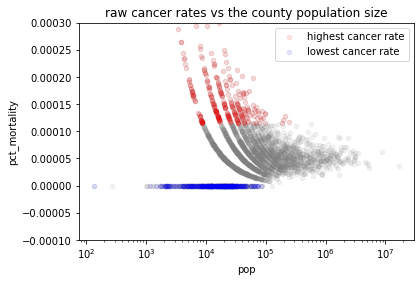

In [5]:
#plt.figure(figsize = (10,10))
scatter_plot_cancer_rates(df)
plt.title("raw cancer rates vs the county population size")
plt.show()

<font color="darkblue">
    

**Answer:**

The countries with highest and lowest cancer rate are those countries with low populations, located on the left side of the scatterplot. Both the highest rates mortality and the lowest rates mortality counties are not the points have large population.
    
This could happen due to drawbacks of MLE estimates, it tends to overfit when data is scarce. Countries with less population may only have few data points, thus resulting in overfitting, exaggerated effect and extreme pct_mortality rate.

2. **(Empirical Bayes)** Using Empirical Bayes and moment matching, choose values for the hyperparameters $\alpha, \beta$ based on your data. Use these values of $\alpha$ and $\beta$ to obtain posterior distributions for each county.

***Hint:*** You'll first need to derive the fact that the ***evidence*** for a Poisson-Gamma model has a Negative Binomial distribution.<br><br>


<font color="darkblue">
    
From the last homework, we first derived $p(\theta_j | \theta_{-j}, y, \alpha, \beta)= Ga(\theta_j; \alpha+y_j, 5n_j+\beta)$  

**Part I.** By Bayes' Theorm,
$$
\begin{align}
p(\theta_j | \theta_{-j}, y, \alpha, \beta) &= \frac{p(\theta| y, \alpha, \beta)}{p( \theta_{-j}| y, \alpha, \beta)} \propto p(\theta| y, \alpha, \beta) = \prod_{i=1}^N p(\theta_i|y, \alpha, \beta) \\
\end{align}
$$

By holding $\theta_{-j}, y, \alpha, \beta$ constant, we could see that $p(\theta| y, \alpha, \beta)$ only depends on $$p(\theta_j| y_j, \alpha, \beta) =\frac{ p(\theta_j, y_j|\alpha, \beta)}{p(\alpha, \beta)}\propto p(\theta_j, y_j|\alpha, \beta) = p(y_j|\theta_j, \alpha, \beta)p(\theta_j|\alpha,\beta)$$.

Then, we could compute the joint distribution of $p(\theta_j, y_j|\alpha, \beta)$ as the product of the two distributions.
    
$$
\begin{align}
p(\theta_j, y_j|\alpha, \beta) &=p(y_j|\theta_j, \alpha, \beta)p(\theta_j|\alpha,\beta)\\ &= Poisson(y_j; 5\cdot n_j \cdot \theta_j)\cdot(\theta_j; \alpha, \beta)\\
&= \frac{(5n_j\theta_j)^{y_j}e^{-5n_j\theta_j}}{y_j!}\cdot\frac{\beta^\alpha\theta_j^{\alpha-1}e^{-\beta\theta_j}}{\Gamma(\alpha)}\\
&\propto \theta_j^{\alpha+y_j-1}e^{-(5n_j+\beta)\theta_j}\\
&= Ga(\theta_j; \alpha+y_j, 5n_j+\beta)
\end{align}
$$
Q.E.D.
    
Thus, we derived that $p(\theta_j | \theta_{-j}, y, \alpha, \beta)= Ga(\theta_j; \alpha+y_j, 5n_j+\beta)$   

<font color="darkblue">

Then we prove $p(y_j) = NB\left(r, p\right)$ using the fact: $\Gamma(\alpha) = (\alpha - 1)!$
\begin{aligned}
p(y_j) &= \frac{p(y_j | \theta_j) p(\theta_j)}{p(\theta_j | y_j)}\\
    &= \frac{Poiss(y_j; 5 \cdot n_j \cdot \theta_j) Ga(\theta_j; \alpha, \beta)}{Ga(\alpha + y_j, 5 n_j  + \beta)}\\
&= \frac{\frac{1}{y_j!} Exp[5 \cdot n_j \cdot \theta_j] \frac{\beta^\alpha}{\Gamma(\alpha)} \theta_j^{\alpha - 1} Exp[-\beta\theta_j]}{\frac{\left(5 n_j  + \beta\right)^{\left( \alpha + y_j\right)}}{\Gamma\left(\alpha + y_j\right)} \theta_j^{\alpha + y_j - 1} Exp[-\left(5 n_j  + \beta\right) \theta_j]}\\
&= \frac{\beta^\alpha\Gamma\left(\alpha + y_j\right)  \left(5 \cdot n_j\right)^{y_j} \theta_j^{\alpha + y_j - 1}Exp[-\left(5 \cdot n_j  + \beta\right)\theta_j]}{y_j!\Gamma(\alpha) \left(5 n_j  + \beta\right)^{\left( \alpha + y_j\right)}\theta_j^{\alpha + y_j - 1} Exp[-\left(5 n_j  + \beta\right) \theta_j]}\\
&= \frac{\beta^\alpha\Gamma\left(\alpha + y_j\right)  \left(5 \cdot n_j\right)^{y_j}}{y_j!\Gamma(\alpha) \left(5 n_j  + \beta\right)^{\left( \alpha + y_j\right)}}\\
&= \frac{\Gamma\left(\alpha + y_j\right)}{y_j!\Gamma(\alpha)}\frac{\beta^\alpha}{\left(5 n_j  + \beta\right)^{\alpha}} \frac{\left(5 \cdot n_j\right)^{y_j}}{\left(5 n_j  + \beta\right)^{y_j}}\\
&= \frac{\Gamma\left((\alpha + y_j - 1) + 1\right)}{y_j!\Gamma(\alpha)} \left( \frac{\beta}{5 n_j  + \beta}\right)^\alpha \left( \frac{5 \cdot n_j}{5 n_j  + \beta}\right)^{y_j}\\
&= \frac{(\alpha + y_j - 1)!}{y_j!\Gamma(\alpha)}\left( \frac{\beta}{5 n_j  + \beta}\right)^\alpha \left( \frac{5 \cdot n_j}{5 n_j  + \beta}\right)^{y_j}\\
&= \frac{(\alpha + y_j - 1)!}{y_j!(\alpha - 1)!}\left( \frac{\beta}{5 n_j  + \beta}\right)^\alpha \left( \frac{5 \cdot n_j}{5 n_j  + \beta}\right)^{y_j}\\
&= \binom{\alpha + y_j - 1}{y_j}\left( \frac{\beta}{5 n_j  + \beta}\right)^\alpha \left( \frac{5 \cdot n_j}{5 n_j  + \beta}\right)^{y_j}\\
&= NB\left(\alpha, \frac{5 n_j}{ 5 n_j + \beta}\right)
\end{aligned}

    
The theoritical mean and variance for negative binomial distribution:
\begin{align}
\mathbb{E}\left[y_j\right] &=  \frac{\alpha5n_j}{\beta} \\
\text{Var}\left[y_j\right] &= \frac{\alpha 5 n_j (5n_j+\beta)}{\beta^2}
\end{align}

Then, the empirical counterparts adjusted by the population of each county:
\begin{aligned}
\widehat{\mathbb{E}}\left[\frac{y_j}{n_j}\right] &= \frac{5\alpha}{\beta}\\
\widehat{\text{Var}}\left[\frac{y_j}{n_j}\right] &= \frac{5 \alpha (5 n_j+\beta)}{n_j\beta^2}  = \frac{5 \alpha(5\bar{n}+\beta)}{\bar{n}\beta^2}
\end{aligned}
For the variance case we shall put population mean instead of $n_j$
    
Solve and get:
\begin{aligned}
\alpha &= \frac{\bar{pop}\widehat{\mathbb{E}}^2 }{\bar{pop} \widehat{\text{Var}} - \widehat{\mathbb{E}}} \\ \\
\beta &= \frac{5 \bar{pop}  \widehat{ \mathbb{E}} }{\bar{pop}\widehat{\text{Var}} - \widehat{\mathbb{E}}}
\end{aligned}
    
    

In [6]:
e_hat = np.mean(y/n)
var_hat = np.var(y/n)
pop_mean = np.mean(n)

alpha = pop_mean*e_hat**2/(pop_mean*var_hat - e_hat)
beta = 5*pop_mean*e_hat/(pop_mean*var_hat - e_hat)

print("empirical cancer rate population adjusted mean: = {}".format(e_hat))
print("empirical cancer rate population adjusted var = {}".format(var_hat))
print("empirical population mean = {}".format(pop_mean))
print('')

print("alpha = {}".format(alpha))
print("beta = {}".format(beta))


empirical cancer rate population adjusted mean: = 5.786552354108626e-05
empirical cancer rate population adjusted var = 2.527523010812238e-09
empirical population mean = 160512.41021522647

alpha = 1.5451734918796929
beta = 133514.17193888978


<font color="darkblue">


Knowing from the derivation that $$\theta_i|y_i \sim Ga(\alpha + y_j, 5 n_j  + \beta)$$
we can sample $\theta$ from $Ga(1.5451734918796929 + y_j, 5 n_j  + 133514.17193888978)$ and compute the mean or mode from the samples:

In [7]:
# update estimate
thetas = []
for i in range(5000):
    thetas.append(np.random.gamma(alpha + df['dc'].values, 1. / (beta + 5 * n)))
thetas = np.array(thetas)
thetas_mean = np.mean(thetas, axis=0)

3. **(Posterior Means)** Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size (in log scale). Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot again, scatter plot the posterior mean cancer rate estimates vs the county population size, highlight these means in green. 

  Using the scatter plot, explain why using the posterior means (from our model) to estimate cancer rates is preferable to studying the raw rates themselves.

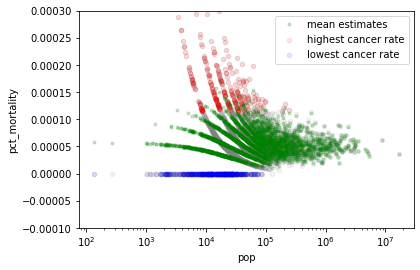

In [8]:
scatter_plot_cancer_rates(df, estimates=thetas_mean)
plt.legend()
plt.show()

<font color="darkblue">
    

**Answer:**

Comparing to previous plot, we can observe that the posterior means to estimate cancer rate produce less extreme pct_mortality result. For countries with low population, it no longer has extreme high or low cancer rate, instead, they trend towards population average. It is preferable because the mean estimate mitigates the effect of small population size and overfitting problem.

## Part II: Hierarchical Bayes
Rather than choosing fixed constants for the hyperparameters $\alpha, \beta$, following the Bayesian philosophy, we typically put additional priors on quantities of which we are uncertain. That is, we model the kidney cancer rates using a ***hierarchical model***:

\begin{aligned}
y_j| \theta_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j | \alpha, \beta &\sim Ga(\alpha, \beta), \quad j = 1, \ldots, N\\
\alpha &\sim Ga(a, b)\\
\beta &\sim Ga(c, d)
\end{aligned}
where $a, b, c, d$ are hyperparameters. 

1.  **(Posterior Marginal Means)** Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size (in log scale). Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot again, scatter plot the mean of the posterior marginal distribution over $\theta_j$, i.e. $p(\theta_j|y_1, \ldots, y_N)$, vs the county population size (in log scale), highlight these means in orange. 

  You should use `pymc3` to sample from the posterior. Compare `pymc3`'s sampler with your sampler from the previous homework, what is the difference (if any) in the performance of these samplers?<br><br>


In [9]:
# import relevant package
import pymc3 as pm
from pymc3 import model_to_graphviz

In [10]:
# hyperparameters
a, b, c, d = 9, 6, 9, 0.00001
burn_in = 0.1
thinning = 10

y = df['dc'].values
n = df['pop'].values
average_pop = n.mean()


In [11]:
#define hierarchical model in pymc3
with pm.Model() as hierarchical_model:
    #priors on alpha
    alpha = pm.Gamma('alpha', alpha=a, beta=b)
    #priors on beta
    beta = pm.Gamma('beta', alpha=c, beta=d)
    #priors on theta
    theta = pm.Gamma('theta', alpha=alpha, beta=beta, shape=len(y))
    
    #convert rate into number of disease incidents
    mu = theta * 5 * n
    
    #likelihood
    y_obs = pm.Poisson('y', mu=mu, observed=y)
    

In [12]:
#draw graphical model for the thing we just defined  
# model_to_graphviz(hierarchical_model)


In [13]:
with hierarchical_model:
    # using default sampler
    trace = pm.sample(1000, tune=1000, target_accept = 0.9) 
    print(f'DONE')

<ipython-input-13-995cae4c87d5>:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, tune=1000, target_accept = 0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 48 seconds.
The number of effective samples is smaller than 25% for some parameters.


DONE


In [14]:
N = len(trace['theta'])
theta_trace = trace['theta'][int(burn_in * N)::thinning]
pymc_post_mean = np.mean(theta_trace, axis=0)

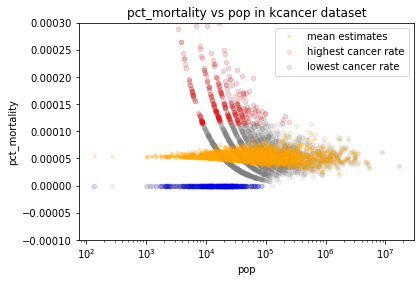

In [15]:
# make scatter plot
scatter_plot_cancer_rates_orange(df,estimates = pymc_post_mean )
plt.title("pct_mortality vs pop in kcancer dataset")
plt.legend()


<font color="darkblue">
    
**Interpretation**:

From this graph, we could observe that mean estimate from the posterior marginal distribution that sampled by hierarchical model using pymc3 now shrink to population mean, with more shrinkage for low population counties. 

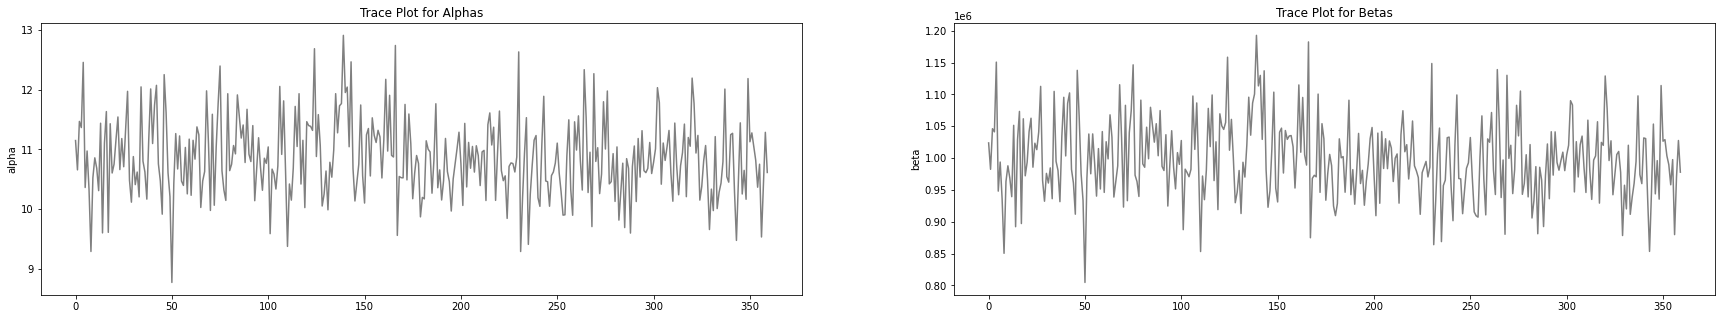

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(30, 5))
#N = len(trace['theta'].T[county_1])
alpha_trace = trace['alpha'][int(burn_in * N)::thinning]
beta_trace = trace['beta'][int(burn_in * N)::thinning]

ax[0].plot(range(len(alpha_trace)), alpha_trace, color='gray')
ax[0].set_title('Trace Plot for Alphas')
ax[0].set_ylabel('alpha')
ax[1].plot(range(len(beta_trace)), beta_trace, color='gray')
ax[1].set_title('Trace Plot for Betas')
ax[1].set_ylabel('beta')
plt.show()

Text(0.5, 1.0, 'trace plot for theta_1')

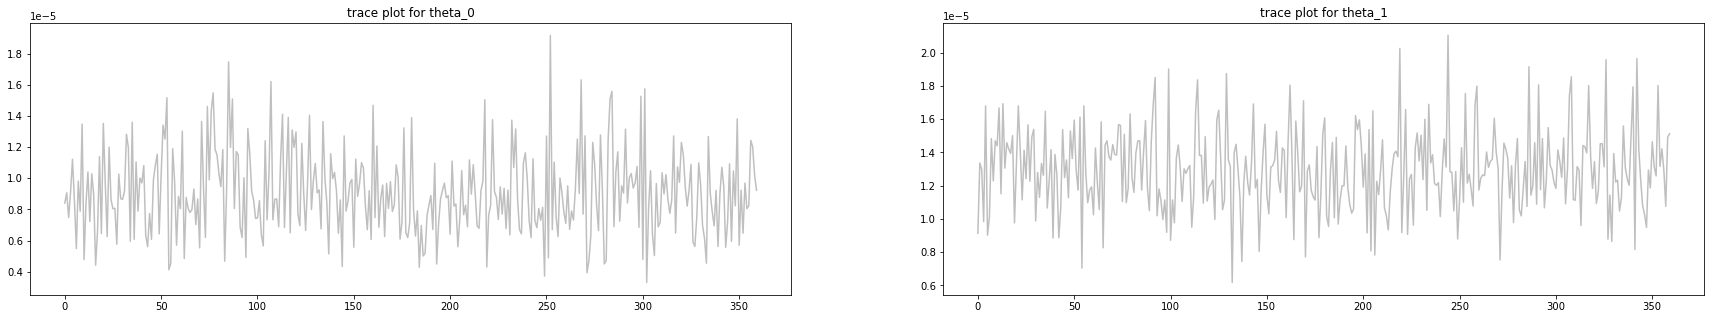

In [17]:
#select the county to visualize the traceplot for theta
#same countries to compare with last homework
county_1 = 0
county_2 = 1

#plot the traceplots for one theta and alpha and beta
fig, ax = plt.subplots(1, 2, figsize=(30, 5))
N = len(trace['theta'].T[county_1])
theta_trace = trace['theta'][int(burn_in * N)::thinning].T[county_1]
ax[0].plot(range(len(theta_trace)), theta_trace, color='gray', alpha=0.5)
ax[0].set_title('trace plot for theta_{}'.format(county_1))

theta_trace = trace['theta'][int(burn_in * N)::thinning].T[county_2]
ax[1].plot(range(len(theta_trace)), theta_trace, color='gray', alpha=0.5)
ax[1].set_title('trace plot for theta_{}'.format(county_2))

<font color="darkblue">
    
**Interpretation**:

Comparing to last homework where visual graph show clearly evidence of non-convergence of $\alpha$ and $\beta$ after multiple rounds of Gibbs-MH sampling, this graph shows a considerable level of convergence, and looks better than last time.
    
I selected two counties that is the same as last time in homework 4 and compare for posterior marginal distribution of $\theta$. It seems they have converged and are fluctuating within a small range too. It seems this sampler perform better than our Gibbs MH sampler implemented. This could be due to a better choice of proposal alpha beta distribution and hyperparameters, and a more complex implementation of sampling method.

2.  **(Hierarchical Bayes vs Empirical Bayes)** Compare the shrinkage of the posterior marginal means of the hierarchical model to the shrinkage of the posterior means from the Bayesian model with empirical Bayes estimates for $\alpha, \beta$. What is the difference in shrinkage between the full hierarchical model and the Bayesian model with empirical Bayes?

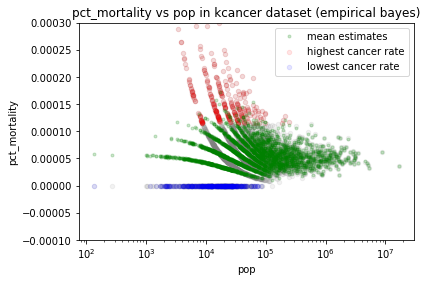

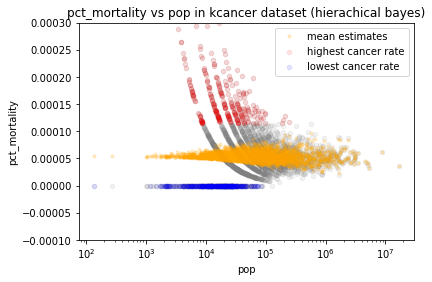

In [18]:
scatter_plot_cancer_rates(df, estimates=thetas_mean)
plt.title("pct_mortality vs pop in kcancer dataset (empirical bayes)")
plt.legend()
plt.show()

scatter_plot_cancer_rates_orange(df, estimates = pymc_post_mean)
plt.title("pct_mortality vs pop in kcancer dataset (hierachical bayes)")
plt.legend()
plt.show()

<font color="darkblue">
    
**Interpretation**:
    
Comparing two plots with green shrinkage (empirical bayes) and the orange shrinkage (hierachical bayes) of mean estimates, we could observe a larger shrinkage for the counties with least population in hierachical bayes estimations than empirical bayes estimates.
    
The hierarchy model pulls together the pct_mortality drastically for counties with small population size, while empirical bayes still shows strips of trends of pct_mortality that are not shrinked to a population mean for counties with small population size. The variations observed in hierachial bayes estimate are that there exists higher variance in the middle parts of population size. However, this doesn't seem to correlated with population size, nor due to the result of overfitting. It could be random variation instead of systematic variation. With hierachical bayes we can safely conclude that the cancer rate is almost the same for all counties regardless of population size, which also makes much more sense in real life.

## Part III: Broader Impact Analysis

Starting in 2020, major machine learning conferences are beginning to ask authors as well as reviewers to explicitly consider the broader impact of new machine learning methods. To properly evaluate the potential good or harm that a piece of technology (AI or not) can do to the general public, we need to be aware that no technology is deployed in ideal conditions or in perfectly neutral contexts. In order to assess the potential broader impact of technology, we need to analyze the social systems/institutions of which these technologies will become a part.

To help you analyze the broader impact of your technology, begin by considering the following questions:

I. Identify the relevant socio-technical systems
  - In what social, political, economic system could the tech be deployed?
  - How would the tech be used in these systems (what role will it take in the decision making processes)?<br><br>
  
II. Identify the stakeholders
  - Who are the users?
  - Who are the affected communities (are these the users)?
  
    ***Hint:*** users are typically decision makers who will use the technology as decision aids (e.g. doctors), whereas affected communities may be folks who are impacted by these decisions but who are not represented in the decision making process (e.g. patients).<br><br>
    
III. What types of harm can this tech do?
  - What kinds of failures can this tech have?
  - What kinds of direct harm can these failures cause?
  - What kinds of harm can the socio-technical system cause?
  
    ***Hint:*** many technical innovations have niche applications, they may sit in a long chain of decision making in a complex system. As such, it may seem, at first glance, that these technologies have no immediate real-life impact. In these cases, it’s helpful to think about the impact of the entire system and then think about how the proposed innovations aid, hamper or change the goals or outcomes of this system.<br><br>
    
IV. What types of good can this tech do?
  - What kinds of needs do these users/communities have?
  - What kinds of constraints do these users/communities have?<br><br>
  
1. **(Computational Footprint)**  In Homework #4, we considered the broader impact of the this hierarchical model for kidney cancer: we examined under what circumstances a hierachical model for kidney cancer is more preferable to a MLE model or a Bayesian model with hand-picked priors. In this problem, we compare hierarchical Bayes and empirical Bayes. 

  In practical terms, what are the real-life advantages and drawbacks of implementing an empirical Bayesian model compared with an hierarchical Bayesian model?
  
  **Hint:** for example, compare how tractable it is to implement the inference algorithm for each model, compare how easy it is to for the inference method for each model to converge (would you know that your training has converged?). Consider also: how easily could a practitioner diagnose the training process and how could they evaluate the model fit and what kinds of computational resurces would be required to train each model.
  


<font color="darkblue">
    
**Answers**:
    
When put this model for kidney cancer and health care resources, we are sampling and estimating $\theta$, which is the underlying kidney cancer rate for that county. The other components of the decision system in which the model will deployed will be citizens living in that county, patients receiving kidney cancer related healthcare or treatments, government, resources department, hospital, doctors etc.
    
End user will be government, resources department, hospital, doctors etc;
Affected communities will be citizens living in that county, patients receiving kidney cancer related healthcare or treatments.
    
Whether it is more preferable to use a hiearchical model, an MLE model, a Bayesian model with hand-picked priors, or here, an empirical model depends more on a downstream task. 
    
        
* Real life advantages:
   * Easy to implement and compute, more tractable to implement the inference algorithm for empirical Bayesian model compared with an hierarchical Bayesian.
   * As we only need to look at evidence moments, it is more easy to understand and interpret to end user and community.
   * We don't need to hand pick prior that incorporate our prior belief if we have no experience in the field. It avoids the risk of a poor choice of prior.
   * It will converge when data size gets larger.
   
    
    
**Drawbacks of implementing an empirical Bayesian model compared with an hierarchical Bayesian model:**
   * It may heavily depend on data quality and data size. Unlike how little poor choice of hierarchical model was, it has less effect on estimatation $\theta$. However, the data quality in empirical model heavily decides our estimation.
   * It may not converge, or the mean estimate we observed may not shrink to a range. There's still overfitting in low population or small size data points. Those data points are unable to borrow statistical power from data points with more populations like in hierarchial models.
   * If not converged or shrink to a population mean, this will leads to difficulty for government and agency to figure out where to fund, which county has higher kidney cancer rate. 
   * The needs for evidence and samples will leads to questions about where to put clinical trials, how many trials shall we obtain in terms of data points; Healthcare data points is unlike other data points to collect, it needs a lot of resource and invests to obtain.
   * If we overestimate the cancer rate, it's not serving anything or communities; it's not serving people who needed; The actual death rate is not that high; If we underestimate the cancer rate, we might under devote health care resources to needed people and county;
   * We might also missing out envrionment factors that affect the rate.
   * The algorithm may not always be tractable. If the population is non-conjugate prior, then it would be hard to sample from population to get needed data points for empirical bayesian model.
   * It's hard to diagnose issue within the data after we obtain the estimation.
    
    

 

2. **(Mitigation of Potential Negative Impacts)** Based on your answers for the previous question and your broader impact analysis from HW#4, what information would the model designer/engineer need to disclose to the end-users to mitigate potentially negative impacts?

  **Hint:** consider how your end-user would be able to validate the model (how would they know if the model is working or has ceased to work once it has been deployed), how should the end-user choose between implementing a hiearchical Bayesian model or an empirical Bayesian model, how could the end-user identify and mitigate negative impacts (if they occur).

<font color="darkblue">
    
**Answers**:
    
The potential downside and negative impacts, as mentioned briefly above, could be that 
- If we overestimate the cancer rate, it's not serving anything or communities; it's not serving people who needed; The actual death rate is not that high; If we underestimate the cancer rate, we might under devote health care resources to needed people and county;
- If there exists systematic inequality, the model are helping to exaggerated it. For example, in rural counties they might already have low income, bad infrastructure, and a bad sampling model will help to systematically exaggerating the circumstance.
    
To mitigate negative impacts, end users should be able to validate the models by convergence check (traceplots etc), cross validation with human experts and experienced professionals. They should also treat end result with care and involve human decison making instead of fully taking computed results.

For patients and other affected communities, end users should give full disclosure of how model is being used and deployed, giving advice per treatment. Besides, other environmental factors should also be reviewed before making decision.
    
The next thing we would like to consider is that if any of these mistakes or negative impacts happening at random?

- Data inbalance in healthcare is a huge problem (For example, gender data inequality, in many cases there's seldom woman data points, which is regarded as a commonly underpresented group.) The model may exaggerate this problem, and also overfit to one sub-population while be harmful to predictions in other subpopulation. 
- Model for these data are qualitatively different. Studies in man doesn't generalize to women.
- For subgroups that are previously undersample, we will likely to remove them, as they look like outliers (Small data inside big data problem).
- Thus, maybe consider using a mixture of several models to compare and cross check for estimation, and also allow small data size points to borrow statistical power from large data size points like what hierarchial model does would be a preferable choice.